<h1 style="text-align:center;">Face Recognition Using PCA</h1>
<p style="text-align:center;">
Nazar Khan
<br>CVML Lab
<br>University of The Punjab
</p>

---
# **Part 1: Face Recognition**

This tutorial shows how to use Principal Component Analysis (PCA) for face recognition. The goal is to introduce PCA concepts while applying them to a real-world problem of recognizing faces from images.

---

## 1. **Introduction to PCA**
PCA is a dimensionality reduction technique. For face recognition:
- It helps reduce the large-dimensional pixel space to a smaller-dimensional "face space."
- It captures the most significant variance (principal components) in the data.
- Each face image can be represented as a linear combination of these principal components.

---

## 2. **Dataset**
We'll use the **Labeled Faces in the Wild (LFW)** dataset, available in `sklearn.datasets`.

---

## 3. **Code Implementation**

### 3.1 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

### 3.2 Load and Visualize the Dataset

Number of samples: 1560, Image shape: 50x37, Number of classes: 12


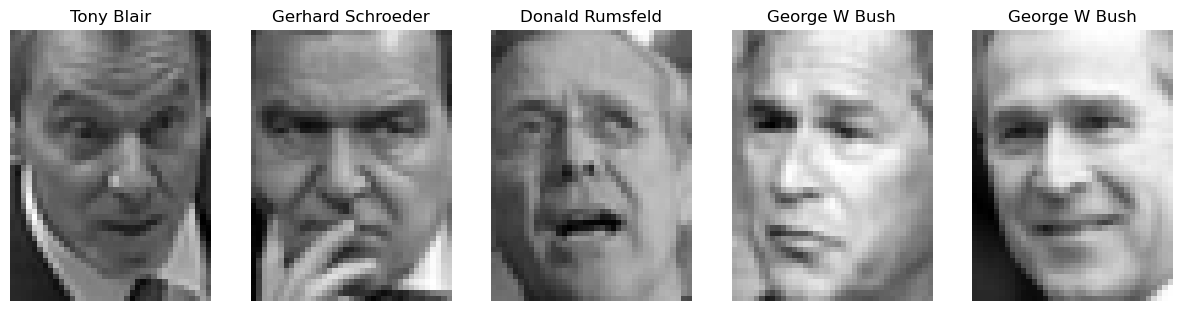

In [2]:
# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

# Images and labels
images = lfw_people.images  # Shape: (n_samples, h, w)
labels = lfw_people.target
label_names = lfw_people.target_names
n_samples, h, w = images.shape

print(f"Number of samples: {n_samples}, Image shape: {h}x{w}, Number of classes: {len(label_names)}")

# Visualize some sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(label_names[labels[i]])
    ax.axis('off')
plt.show()

### 3.3 Flatten Images for PCA

In [3]:
# Flatten the images into 1D arrays
X = images.reshape(n_samples, -1)  # Shape: (n_samples, h*w)
y = labels

### 3.4 Split the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 1170, Test samples: 390


### 3.5 Apply PCA

In [28]:
# Apply PCA to reduce dimensions
n_components = 50  # Number of principal components (can tune this)
pca = PCA(n_components=n_components, whiten=False, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original dimension: {X_train.shape[1]}, Reduced dimension: {X_train_pca.shape[1]}")


Original dimension: 1850, Reduced dimension: 50


### 3.6 Visualize Eigenfaces

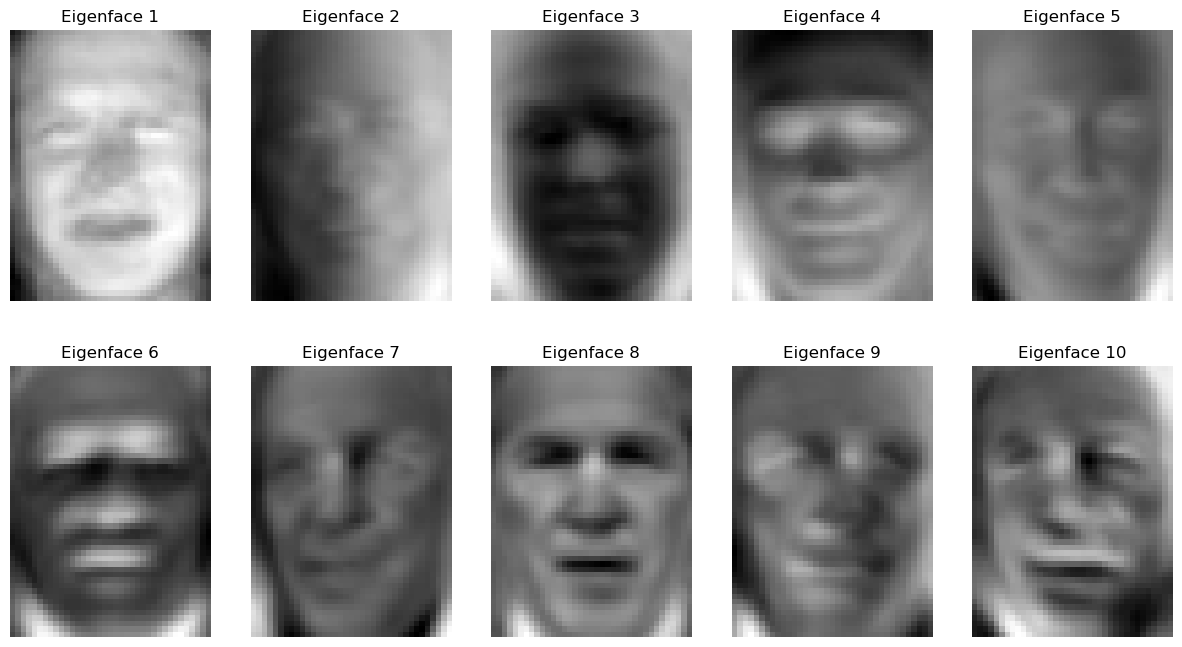

In [29]:
# Visualize the first few principal components (eigenfaces)
eigenfaces = pca.components_.reshape((n_components, h, w))

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for i, ax in enumerate(axes.flat[:10]):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')
plt.show()

### 3.7 Train a Classifier

In [30]:
# Train a Support Vector Machine (SVM) classifier on PCA-transformed data
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

### 3.8 Test the Model

Classification Report:
                   precision    recall  f1-score   support

     Ariel Sharon       0.52      0.81      0.63        16
     Colin Powell       0.76      0.83      0.80        66
  Donald Rumsfeld       0.55      0.59      0.57        27
    George W Bush       0.81      0.82      0.82       140
Gerhard Schroeder       0.43      0.42      0.43        24
      Hugo Chavez       0.65      0.65      0.65        17
   Jacques Chirac       0.43      0.30      0.35        10
    Jean Chretien       0.69      0.64      0.67        14
    John Ashcroft       0.69      0.69      0.69        16
Junichiro Koizumi       1.00      0.82      0.90        11
  Serena Williams       0.75      0.67      0.71         9
       Tony Blair       0.72      0.53      0.61        40

         accuracy                           0.72       390
        macro avg       0.67      0.65      0.65       390
     weighted avg       0.72      0.72      0.71       390



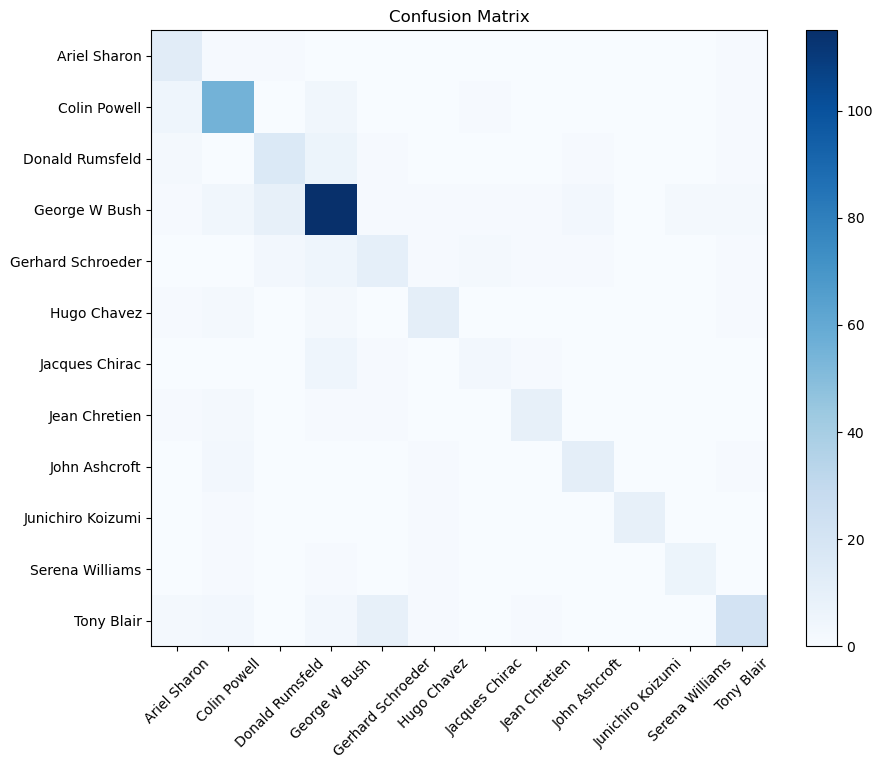

In [31]:
# Predict on test set
y_pred = clf.predict(X_test_pca)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(label_names)), label_names, rotation=45)
plt.yticks(np.arange(len(label_names)), label_names)
plt.title("Confusion Matrix")
plt.show()

---

## 4. **Key Takeaways**
1. **Dimensionality Reduction**: PCA reduces high-dimensional images to lower-dimensional representations while retaining significant variance.
2. **Eigenfaces**: PCA captures key facial features, forming the "eigenfaces" that represent variations in the dataset.
3. **Recognition**: Classifiers trained on PCA-transformed data can achieve good accuracy with reduced computation.

---

## 5. **Exercise**
- Change the number of principal components and observe the effect on accuracy.
- Try other classifiers like `RandomForestClassifier` or `KNeighborsClassifier`.
- Explore clustering on PCA-reduced data.

---
# **Part 2: Generative AI: Generating new faces from principal components**

To generate new faces using the PCA model, we can sample random points in the reduced PCA space and then project these points back into the original image space. These reconstructed images represent new faces as linear combinations of the "eigenfaces."

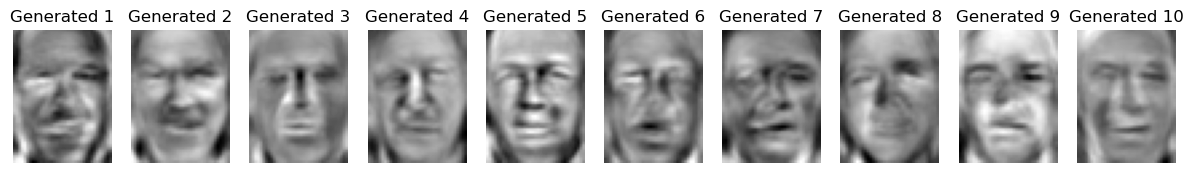

In [32]:
# Function to generate new faces
def generate_new_faces(pca, n_faces, h, w):
    """
    Generate new faces by sampling in the PCA-reduced space.
    
    Parameters:
        pca: Trained PCA model
        n_faces: Number of new faces to generate
        h, w: Height and width of original images
    
    Returns:
        new_faces: Generated face images
    """
    # Sample random points in the reduced PCA space
    random_points = np.random.normal(0, 1, size=(n_faces, pca.n_components_))
    
    # Transform back to the original space
    new_faces = pca.inverse_transform(random_points)
    
    # Reshape to original image dimensions
    new_faces = new_faces.reshape((n_faces, h, w))
    return new_faces

# Generate new faces
n_generated_faces = 10  # Number of new faces to create
new_faces = generate_new_faces(pca, n_generated_faces, h, w)

# Visualize the generated faces
fig, axes = plt.subplots(1, n_generated_faces, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(new_faces[i], cmap='gray')
    ax.set_title(f"Generated {i+1}")
    ax.axis('off')
plt.show()

---

### **How It Works**
1. **Random Sampling in PCA Space**: We sample random points in the reduced PCA space. These random points correspond to combinations of principal components (eigenfaces).
2. **Inverse Transformation**: Using `pca.inverse_transform()`, the random points are transformed back into the original image space.
3. **Visualization**: The resulting images are reshaped to their original dimensions (`h x w`) and displayed.

---

### **Exercise for Students**
- Experiment with different random distributions (e.g., uniform distribution or varying standard deviations).
- Use specific principal components to modify facial features (e.g., sample points near certain eigenfaces to emphasize specific variations like smiling or lighting).
- Analyze how the choice of the number of principal components affects the quality of generated faces.

---

This approach demonstrates how PCA can not only compress and analyze data but also synthesize new samples based on learned patterns.